## Three Stock Monte

This exercise tests your ability to retrieve stock price data using the Alpaca API and simulate multiple portfolio compositions using Monte Carlo Simulation.

Instructions:

1. Review the libraries and dependencies that have been imported into the `three_stock_monte.ipynb` notebook. Note that the MCSimulation tools have been imported into the notebook via the MCForecastTools library. The `Unsolved` folder includes the MCForecastTools library as a Python file .

2. Create an environment file (`.env`) in the `Unsolved` folder. Include variables for `ALPACA_API_KEY` and `ALPACA_SECRET_KEY` in this file for accessing the Alpaca API.

3. Load the environment variables into `three_stock_monte.ipynb`, and then import the Alpaca API and secret keys.

4. Set up the Alpaca API `REST` object. Make sure that this object includes your Alpaca API key, your Alpaca secret key, and a reference to the version that you’re using.

5. Use the Alpaca SDK to make an Alpaca API call that gets three years of daily historical price data for the following three stocks:

    - `NKE` (Nike)

    - `T` (AT&T)

    - `XOM` (Exxon Mobil)

6. Create an instance of MCSimulation with the following parameters that simulates the next five years of portfolio returns:

    - `weights`: Set this parameter to `[.33,.33,.33]` to evenly invest across all three stocks.

    - `num_simulation`: Set this parameter to `1000` to ensure the reliability of your simulation. If your computer struggles to run 1000 simulations, change the parameter value to 500.

    - `num_trading_days`: Set this parameter to `252*5` to simulate five years of trading days.

7. Run the Monte Carlo simulation. Using MCSimulation functions, visualize the simulation results by using both an overlay line plot and a histogram. Generate the summary statistics for the simulation, too.

8. Using a 95% confidence interval and your initial investment of $15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.

9. Create a second instance of MCSimulation with the same parameters, but set the `weights` parameter to `[.20,.60,.20]` to represent a portfolio with a majority of AT&T stock.

10. Run the Monte Carlo simulation with the new weights. Then use MCSimulation functions to do the following:

    - Visualize the simulation results by using both an overlay line plot and a histogram.

    - Generate the summary statistics for this new simulation.

    - Using a 95% confidence interval and your initial investment of $15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.

11. Create a third instance of MCSimulation with the same parameters, but set the `weights` variable to `[.60,.20,.20]` to represent a portfolio with a majority of Nike stock.

12. Run the Monte Carlo simulation with the new weights. Then use MCSimulation functions to do the following:

    - Visualize the simulation results by using both an overlay line plot and a histogram.

    - Generate the summary statistics for this new simulation.

    - Using a 95% confidence interval and your initial investment of $15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.

13. Create a fourth instance of MCSimulation with the same parameters, but set the `weights` variable to `[.20,.20,.60]` to represent a portfolio with a majority of Exxon stock.

14. Run the Monte Carlo simulation with the new weights. Using a 95% confidence interval and your initial investment of $15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.

15. Review all four simulated portfolios, and determine which set of investments gives you the best chance of a profit. In your notebook, write which portfolio you choose, and why.

References:

[Alpaca API Docs](https://alpaca.markets/docs/api-documentation/)


## Step 1: Review the libraries and dependencies that have been imported into the `three_stock_monte.ipynb` notebook. Note that the MCSimulation tools have been imported into the notebook via the MCForecastTools library. The `Unsolved` folder includes the MCForecastTools library as a Python file .

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

## Step 2: Create an environment file (`.env`) in the `Unsolved` folder. Include variables for `ALPACA_API_KEY` and `ALPACA_SECRET_KEY` in this file for accessing the Alpaca API

## Step 3: Load the environment variables into `three_stock_monte.ipynb`, and then import the Alpaca API and secret keys.

* Load the environment variable by calling the `load_dotenv()` function.
* Set the value of the variables `alpaca_api_key` and `alpaca_secret_key` equal to their respective environment variables. 
* Confirm the variables are available by checking the `type` of each. 

In [2]:
# Load the environment variables by calling the load_dotenv function
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret by calling the os.getenv function and referencing the environment variable names
# Set each environment variable to a notebook variable of the same name
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Check the values were imported correctly by evaluating the type of each
display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

## Step 4: Set up the Alpaca API `REST` object. Make sure that this object includes your Alpaca API key, your Alpaca secret key, and a reference to the version that you’re using.

In [4]:
# Create your Alpaca API REST object by calling Alpaca's tradeapi.REST function
# Set the parameters to your alpaca_api_key, alpaca_secret_key and api_version="v2" 
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

## Step 5:  Use the Alpaca SDK to make an Alpaca API call that gets three years of daily historical price data for the following three stocks: NKE, T, and XOM.

* Create the list for the required `tickers`.
* Set the values for `start_date` and `end_date` using the `pd.Timestamp` function. The dates should be 2017-05-01 through 2020-05-01.
* Set the `timeframe` value to 1 day.
* Create the `portfolio_prices_df` DataFrame by setting it equal to the `alpaca.get_barset` function. 


In [5]:
# Create the list for the required tickers
tickers = ["NKE", "T", "XOM"]

In [6]:
# Set the values for start_date and end_date using the pd.Timestamp function
# Inside the function set the date parameter to the prior business day 
# The start and end data should be 2017-05-01 to 2020-05-01
# Set the parameter tz to "America/New_York", 
# Set this all to the ISO format by calling the isoformat function 
start_date = pd.Timestamp("2017-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

In [7]:
# Set timeframe to one day (1D)
timeframe = "1D"

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [8]:
# Use the Alpaca get_barset function to gather the price information for each ticker
# Include the function parameters: tickers, timeframe, start, end, and limit
# Be sure to call the df property to ensure that the returned information is set as a DataFrame
prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=limit_rows
).df

# Review the first five rows of the resulting DataFrame 
prices_df.head()

NKE                                      T  \
                            open   high    low   close    volume   open   
time                                                                      
2017-05-01 00:00:00-04:00  55.43  55.45  54.98  55.000   4058571  39.68   
2017-05-02 00:00:00-04:00  55.12  55.16  54.79  55.065   6540607  39.14   
2017-05-03 00:00:00-04:00  55.17  55.30  54.40  54.540   7135145  38.94   
2017-05-04 00:00:00-04:00  54.68  54.83  54.20  54.480   5946565  38.41   
2017-05-05 00:00:00-04:00  54.36  54.50  53.56  53.960  10734266  38.08   

                                                            XOM           \
                            high    low  close    volume   open     high   
time                                                                       
2017-05-01 00:00:00-04:00  39.70  39.06  39.12  21447477  81.51  82.2100   
2017-05-02 00:00:00-04:00  39.22  38.88  38.93  20778503  82.20  82.5900   
2017-05-03 00:00:00-04:00  38.98  38.15  38.39  28905812  81.97  83.0699   
2017-05-04 00:00:00-04:00  38.42  37.63  38.01  27053119  82.29  82.3600   
2017-05-05 00:00:00-04:00  38.71  38.03  38.56  18887397  81.63  82.2350   

                                                    
                             low   close    volume  
time                                                
2017-05-01 00:00:00-04:00  81.48  82.150   7006117  
2017-05-02 00:00:00-04:00  81.90  82.000   7278683  
2017-05-03 00:00:00-04:00  81.91  82.655   8182846  
2017-05-04 00:00:00-04:00  81.40  81.640  13394732  
2017-05-05 00:00:00-04:00  81.61  82.020   8061308

## Step 6:  Create an instance of MCSimulation with the following parameters that simulates the next five years of portfolio returns:

* `weights`: Set this parameter to `[.33,.33,.33]` to evenly invest across all three stocks.
* `num_simulation`: Set this parameter to `1000` to ensure the reliability of your simulation. If your computer struggles to run 1000 simulations, change the parameter value to 500.
* `num_trading_days`: Set this parameter to `252*5` to simulate five years of trading days.


In [9]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns
# Use an even weight of .33 across all 3 stocks
MC_even_weight = MCSimulation(
    portfolio_data = prices_df,
    weights = [.33,.33,.33],
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Printing the first five rows of the simulation input data
MC_even_weight.portfolio_data.head()

NKE                                               \
                            open   high    low   close    volume daily_return   
time                                                                            
2017-05-01 00:00:00-04:00  55.43  55.45  54.98  55.000   4058571          NaN   
2017-05-02 00:00:00-04:00  55.12  55.16  54.79  55.065   6540607     0.001182   
2017-05-03 00:00:00-04:00  55.17  55.30  54.40  54.540   7135145    -0.009534   
2017-05-04 00:00:00-04:00  54.68  54.83  54.20  54.480   5946565    -0.001100   
2017-05-05 00:00:00-04:00  54.36  54.50  53.56  53.960  10734266    -0.009545   

                               T                                              \
                            open   high    low  close    volume daily_return   
time                                                                           
2017-05-01 00:00:00-04:00  39.68  39.70  39.06  39.12  21447477          NaN   
2017-05-02 00:00:00-04:00  39.14  39.22  38.88  38.93  20778503    -0.004857   
2017-05-03 00:00:00-04:00  38.94  38.98  38.15  38.39  28905812    -0.013871   
2017-05-04 00:00:00-04:00  38.41  38.42  37.63  38.01  27053119    -0.009898   
2017-05-05 00:00:00-04:00  38.08  38.71  38.03  38.56  18887397     0.014470   

                             XOM                                    \
                            open     high    low   close    volume   
time                                                                 
2017-05-01 00:00:00-04:00  81.51  82.2100  81.48  82.150   7006117   
2017-05-02 00:00:00-04:00  82.20  82.5900  81.90  82.000   7278683   
2017-05-03 00:00:00-04:00  81.97  83.0699  81.91  82.655   8182846   
2017-05-04 00:00:00-04:00  82.29  82.3600  81.40  81.640  13394732   
2017-05-05 00:00:00-04:00  81.63  82.2350  81.61  82.020   8061308   

                                        
                          daily_return  
time                                    
2017-05-01 00:00:00-04:00          NaN  
2017-05-02 00:00:00-04:00    -0.001826  
2017-05-03 00:00:00-04:00     0.007988  
2017-05-04 00:00:00-04:00    -0.012280  
2017-05-05 00:00:00-04:00     0.004655

# Step 7: Run the Monte Carlo simulation. Using MCSimulation functions, visualize the simulation results by using both an overlay line plot and a histogram. Generate the summary statistics for the simulation, too.

In [10]:
# Run a Monte Carlo simulation to forecast five years cumulative returns
MC_even_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004265,1.009536,1.006818,1.000615,1.013677,0.979544,0.984579,1.008784,0.986474,0.986931,...,0.986735,0.998892,1.007798,1.021649,1.003015,0.993298,1.007645,1.003741,0.991324,1.006668
2,1.003901,1.017515,0.995529,1.002338,1.016014,0.976032,0.966472,1.006192,0.991955,0.987589,...,0.982748,1.013319,0.995483,1.018309,1.005872,0.990415,1.007775,0.987320,0.996928,1.003360
3,1.008347,1.013673,1.016770,1.004263,1.009014,0.972673,0.972944,1.004135,1.000256,0.996651,...,0.969953,1.016902,1.010173,1.022841,0.998309,0.980480,1.011178,0.982240,0.992589,1.016114
4,1.013006,1.009501,1.033728,0.999382,1.003851,0.966705,0.966396,1.023095,1.004433,1.000254,...,0.982415,1.007835,1.013701,1.027078,0.997680,0.972181,1.026003,0.972127,0.985522,1.011029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.946323,1.007666,0.979740,0.899920,1.042847,0.682339,1.552699,1.240991,0.603996,0.865961,...,0.626604,0.677716,0.575797,0.808624,1.026208,0.536352,1.013049,0.773549,0.740547,1.060101
1257,0.944177,1.015005,0.994661,0.913845,1.042570,0.674860,1.560811,1.268205,0.607108,0.876394,...,0.630887,0.689321,0.581720,0.818722,1.041632,0.531201,1.009669,0.770771,0.740758,1.069554
1258,0.959241,1.016731,0.983697,0.915058,1.065145,0.658118,1.569374,1.279822,0.606281,0.874025,...,0.635653,0.703853,0.571878,0.822047,1.025426,0.534344,1.017781,0.776718,0.748076,1.056538
1259,0.954750,1.026677,0.969365,0.910194,1.081356,0.658686,1.538198,1.309697,0.606172,0.866664,...,0.639296,0.721116,0.566831,0.828294,1.005728,0.546434,1.028213,0.786609,0.733755,1.049276


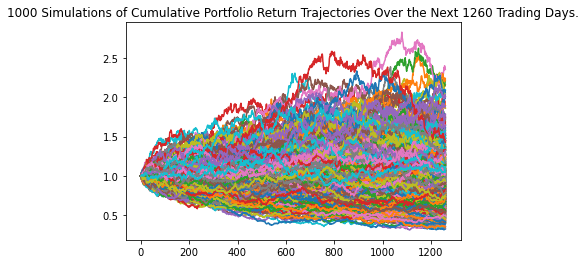

In [11]:
# Visualize the Monte Carlo simulation by creating an
# overlay line plot
even_weight_line_plot = MC_even_weight.plot_simulation()

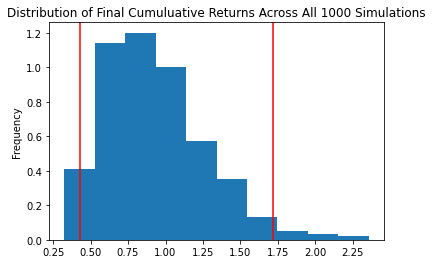

In [12]:
# Visualize the Monte Carlo simulation by creating a histogram
even_weight_distribution_plot = MC_even_weight.plot_distribution()

In [13]:
# Generate the summary statistics for the Monte Carlo simulation
# Save the summary statistics information in a variable called even_weights_table 
even_weight_table = MC_even_weight.summarize_cumulative_return()

# Print the table of summary statistics
print(even_weight_table)

count           1000.000000
mean               0.931036
std                0.334121
min                0.324799
25%                0.684239
50%                0.882059
75%                1.120174
max                2.355626
95% CI Lower       0.430593
95% CI Upper       1.714576
Name: 1260, dtype: float64


## Step 8: Using a 95% confidence interval and your initial investment of 15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.

In [14]:
# Using the lower and upper `95%` confidence interval values 
# (index positions 8 & 9 from the even_weight_table)
# calculate  the range of the possible outcomes for a $15,000 investment 
even_ci_lower = round(even_weight_table[8]*15000,2)
even_ci_upper = round(even_weight_table[9]*15000,2)

# Print results of your calculations
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with an even weight portfolio over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio with an even weight portfolio over the next 5 years will end within in the range of $6458.9 and $25718.64.


## Step 9: Create a second instance of MCSimulation with the same parameters, but set the `weights` parameter to `[.20,.60,.20]` to represent a portfolio with a majority of AT&T stock.

In [15]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns 
# Use a weight of .60 for AT&T and .20 for the remaining 2 stocks
MC_att = MCSimulation(
    portfolio_data = prices_df,
    weights = [.20,.60,.20],
    num_simulation = 1000,
    num_trading_days = 252*5)

# Printing the first five rows of the simulation input data
MC_att.portfolio_data.head()

NKE                                               \
                            open   high    low   close    volume daily_return   
time                                                                            
2017-05-01 00:00:00-04:00  55.43  55.45  54.98  55.000   4058571          NaN   
2017-05-02 00:00:00-04:00  55.12  55.16  54.79  55.065   6540607     0.001182   
2017-05-03 00:00:00-04:00  55.17  55.30  54.40  54.540   7135145    -0.009534   
2017-05-04 00:00:00-04:00  54.68  54.83  54.20  54.480   5946565    -0.001100   
2017-05-05 00:00:00-04:00  54.36  54.50  53.56  53.960  10734266    -0.009545   

                               T                                              \
                            open   high    low  close    volume daily_return   
time                                                                           
2017-05-01 00:00:00-04:00  39.68  39.70  39.06  39.12  21447477          NaN   
2017-05-02 00:00:00-04:00  39.14  39.22  38.88  38.93  20778503    -0.004857   
2017-05-03 00:00:00-04:00  38.94  38.98  38.15  38.39  28905812    -0.013871   
2017-05-04 00:00:00-04:00  38.41  38.42  37.63  38.01  27053119    -0.009898   
2017-05-05 00:00:00-04:00  38.08  38.71  38.03  38.56  18887397     0.014470   

                             XOM                                    \
                            open     high    low   close    volume   
time                                                                 
2017-05-01 00:00:00-04:00  81.51  82.2100  81.48  82.150   7006117   
2017-05-02 00:00:00-04:00  82.20  82.5900  81.90  82.000   7278683   
2017-05-03 00:00:00-04:00  81.97  83.0699  81.91  82.655   8182846   
2017-05-04 00:00:00-04:00  82.29  82.3600  81.40  81.640  13394732   
2017-05-05 00:00:00-04:00  81.63  82.2350  81.61  82.020   8061308   

                                        
                          daily_return  
time                                    
2017-05-01 00:00:00-04:00          NaN  
2017-05-02 00:00:00-04:00    -0.001826  
2017-05-03 00:00:00-04:00     0.007988  
2017-05-04 00:00:00-04:00    -0.012280  
2017-05-05 00:00:00-04:00     0.004655

## Step 10: Run the Monte Carlo simulation with the new weights. Then use MCSimulation functions to do the following:

* Visualize the simulation results by using both an overlay line plot and a histogram.
* Generate the summary statistics for this new simulation.
* Using a 95% confidence interval and your initial investment of 15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.


In [16]:
# Run a Monte Carlo simulation to forecast five years cumulative returns 
# with 60% AT&T (ticker: T) stock
MC_att.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.986010,1.006757,0.989707,1.014777,1.005582,1.003749,1.011154,1.001486,0.986409,0.982168,...,0.999365,1.001173,1.006598,1.011799,1.001572,1.006992,1.012220,1.001811,0.990820,1.017162
2,0.997153,0.982290,0.999959,1.002409,1.002138,1.000109,1.016887,1.001134,0.978476,1.003551,...,0.994187,1.003914,1.014808,1.036828,0.997304,1.013727,1.019392,0.997162,1.000413,1.015374
3,0.995750,0.973183,1.001158,1.007314,1.007391,0.999997,1.006508,1.012706,0.988023,1.016911,...,1.015626,0.989606,1.011871,1.016611,1.002972,1.008230,1.012249,0.996147,1.021739,1.005206
4,0.985766,0.969353,1.028205,0.994070,1.004912,1.006930,0.987889,1.016304,0.959986,1.032728,...,1.030870,0.983593,1.027797,1.037611,1.014014,1.018789,1.007762,1.003840,1.019274,0.987229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.658577,0.709062,0.517309,1.920123,1.219844,0.233283,0.681796,0.690445,1.071885,0.593630,...,0.407643,1.707449,1.794658,0.700158,0.553428,0.527930,0.850731,0.723654,0.780301,0.409595
1257,0.647525,0.727396,0.522091,1.944140,1.226517,0.232149,0.670904,0.697028,1.094852,0.593101,...,0.404636,1.744360,1.770738,0.701368,0.548069,0.516790,0.862284,0.719876,0.772234,0.408244
1258,0.639137,0.727719,0.511144,1.932073,1.217848,0.235874,0.667103,0.702000,1.091199,0.591460,...,0.406849,1.760585,1.750477,0.702373,0.551334,0.519840,0.864191,0.714623,0.752821,0.412869
1259,0.640767,0.723489,0.512287,1.937576,1.215101,0.239072,0.679420,0.701045,1.084071,0.595142,...,0.403021,1.748249,1.743726,0.695016,0.558312,0.508039,0.866477,0.728646,0.760742,0.413734


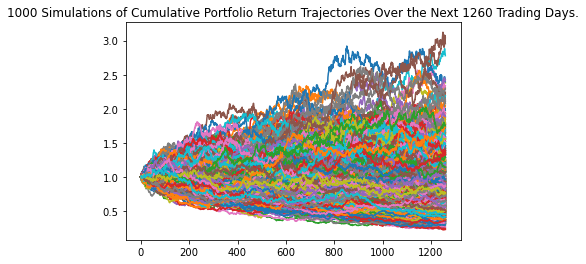

In [17]:
# Visualize the Monte Carlo simulation for a majority weight in AT&T
# by creating an overlay line plot
att_line_plot = MC_att.plot_simulation()

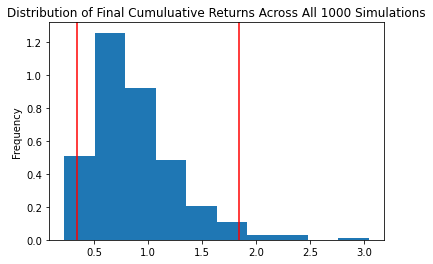

In [18]:
# Visualize the Monte Carlo simulation for a majority weight in AT&T
# by creating a histogram
att_dist_plot = MC_att.plot_distribution()

In [19]:
# Generate the summary statistics for the Monte Carlo simulation with
# majority weight in AT&T
# Save the summary statistics information in a variable called att_table 
att_table = MC_att.summarize_cumulative_return()

# Print summary statistics
print(att_table)

count           1000.000000
mean               0.872541
std                0.388700
min                0.225866
25%                0.600490
50%                0.792563
75%                1.066595
max                3.045164
95% CI Lower       0.346389
95% CI Upper       1.841710
Name: 1260, dtype: float64


In [20]:
# Using the lower and upper `95%` confidence interval values 
# (index positions 8 & 9 from the att_table)
# calculate  the range of the possible outcomes for a $15,000 investment 
att_ci_lower = round(att_table[8]*15000,2)
att_ci_upper = round(att_table[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with a 60% weight in AT&T over the next 5 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio with a 60% weight in AT&T over the next 5 years will end within in the range of $5195.84 and $27625.66.


## Step 11: Create a third instance of MCSimulation with the same parameters, but set the `weights` variable to `[.60,.20,.20]` to represent a portfolio with a majority of Nike stock.

In [21]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns
# Use a weight of .60 for Nike and .20 for the remaining 2 stocks
MC_nike = MCSimulation(
    portfolio_data = prices_df,
    weights = [.60,.20,.20],
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Printing the first five rows of the simulation input data
MC_nike.portfolio_data.head()

NKE                                               \
                            open   high    low   close    volume daily_return   
time                                                                            
2017-05-01 00:00:00-04:00  55.43  55.45  54.98  55.000   4058571          NaN   
2017-05-02 00:00:00-04:00  55.12  55.16  54.79  55.065   6540607     0.001182   
2017-05-03 00:00:00-04:00  55.17  55.30  54.40  54.540   7135145    -0.009534   
2017-05-04 00:00:00-04:00  54.68  54.83  54.20  54.480   5946565    -0.001100   
2017-05-05 00:00:00-04:00  54.36  54.50  53.56  53.960  10734266    -0.009545   

                               T                                              \
                            open   high    low  close    volume daily_return   
time                                                                           
2017-05-01 00:00:00-04:00  39.68  39.70  39.06  39.12  21447477          NaN   
2017-05-02 00:00:00-04:00  39.14  39.22  38.88  38.93  20778503    -0.004857   
2017-05-03 00:00:00-04:00  38.94  38.98  38.15  38.39  28905812    -0.013871   
2017-05-04 00:00:00-04:00  38.41  38.42  37.63  38.01  27053119    -0.009898   
2017-05-05 00:00:00-04:00  38.08  38.71  38.03  38.56  18887397     0.014470   

                             XOM                                    \
                            open     high    low   close    volume   
time                                                                 
2017-05-01 00:00:00-04:00  81.51  82.2100  81.48  82.150   7006117   
2017-05-02 00:00:00-04:00  82.20  82.5900  81.90  82.000   7278683   
2017-05-03 00:00:00-04:00  81.97  83.0699  81.91  82.655   8182846   
2017-05-04 00:00:00-04:00  82.29  82.3600  81.40  81.640  13394732   
2017-05-05 00:00:00-04:00  81.63  82.2350  81.61  82.020   8061308   

                                        
                          daily_return  
time                                    
2017-05-01 00:00:00-04:00          NaN  
2017-05-02 00:00:00-04:00    -0.001826  
2017-05-03 00:00:00-04:00     0.007988  
2017-05-04 00:00:00-04:00    -0.012280  
2017-05-05 00:00:00-04:00     0.004655

## Step 12: Run the Monte Carlo simulation with the new weights. Then use MCSimulation functions to do the following:

*Visualize the simulation results by using both an overlay line plot and a histogram.
* Generate the summary statistics for this new simulation.
* Using a 95% confidence interval and your initial investment of 15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.

In [22]:
# Run a Monte Carlo simulation to forecast five years cumulative returns 
# with 60% Nike (ticker: NKE) stock
MC_nike.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995629,1.016921,0.993729,1.022857,0.996929,1.001877,1.016451,1.005793,1.019136,0.983256,...,1.008677,0.993986,1.012144,0.988115,0.996562,1.007866,1.000401,1.002617,1.016334,1.001381
2,0.974685,1.033083,0.998316,1.021758,0.989303,1.028736,1.002453,1.007602,1.023501,0.975578,...,1.009401,0.990324,1.019098,1.000080,1.013342,1.015494,1.009902,0.983881,1.021147,1.006419
3,0.982689,1.022434,1.009617,1.004044,0.973044,1.031438,0.995159,1.001858,1.031455,0.971653,...,0.998504,1.011321,1.024100,0.987871,1.016617,1.039755,1.008870,0.994183,1.027526,0.998707
4,0.985510,1.034064,0.993295,0.992282,0.978810,1.027810,0.999141,1.007672,1.027921,0.976576,...,1.008594,1.020617,1.008974,0.991847,1.033305,1.037802,0.991898,0.989331,1.051569,1.012263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.186164,1.230540,1.272334,1.582863,1.122310,0.966931,1.300191,1.137963,1.609358,0.887426,...,1.212846,1.137000,2.279545,1.348042,2.119174,1.821861,3.724748,1.185671,2.080306,1.048525
1257,1.212943,1.224098,1.282817,1.593422,1.112983,0.968697,1.298486,1.139979,1.593079,0.872523,...,1.204233,1.157646,2.231670,1.342867,2.082085,1.835942,3.705806,1.184907,2.046008,1.037188
1258,1.224486,1.230335,1.304010,1.604200,1.118278,0.954038,1.306167,1.146183,1.644763,0.868402,...,1.191782,1.182245,2.257186,1.322038,2.114244,1.828622,3.625304,1.198131,2.040859,1.047965
1259,1.224923,1.220349,1.318072,1.622426,1.108355,0.958063,1.285291,1.134121,1.616566,0.871337,...,1.187582,1.189959,2.270562,1.354962,2.090826,1.834189,3.611224,1.193942,2.051655,1.057833


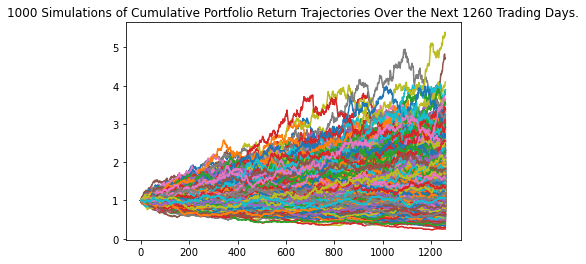

In [23]:
# Visualize the Monte Carlo simulation for a majority weight in Nike
# by creating an overlay line plot
nike_line_plot = MC_nike.plot_simulation()

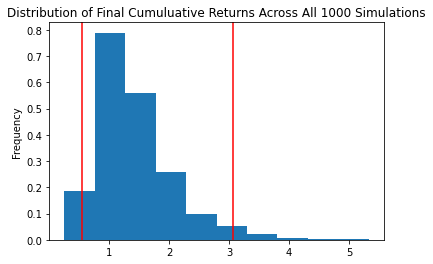

In [24]:
# Visualize the Monte Carlo simulation for a majority weight in Nike
# by creating a histogram
nike_dist_plot = MC_nike.plot_distribution()

In [25]:
# Generate the summary statistics for the Monte Carlo simulation with
# majority weight in Nike
# Save the summary statistics information in a variable called nike_table 
nike_table = MC_nike.summarize_cumulative_return()

# Print summary statistics
print(nike_table)

count           1000.000000
mean               1.415835
std                0.633732
min                0.257888
25%                0.975486
50%                1.278412
75%                1.699110
max                5.324322
95% CI Lower       0.557573
95% CI Upper       3.064410
Name: 1260, dtype: float64


In [26]:
# Using the lower and upper `95%` confidence interval values 
# (index positions 8 & 9 from the nike_table),
# calculate  the range of the possible outcomes for a $15,000 investment 
nike_ci_lower = round(nike_table[8]*15000,2)
nike_ci_upper = round(nike_table[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with a 60% weight in Nike over the next 5 years will end within in the range of"
      f" ${nike_ci_lower} and ${nike_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio with a 60% weight in Nike over the next 5 years will end within in the range of $8363.59 and $45966.15.


## Step 13: Create a fourth instance of MCSimulation with the same parameters, but set the `weights` variable to `[.20,.20,.60]` to represent a portfolio with a majority of Exxon stock.

In [27]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
# Use a weight of .60 for XOM and .20 for the remaining 2 stocks
MC_exxon = MCSimulation(
    portfolio_data = prices_df,
    weights = [.20,.20,.60],
    num_simulation = 1000,
    num_trading_days = 252*5)

# Printing the first five rows of the simulation input data
MC_exxon.portfolio_data.head()

NKE                                               \
                            open   high    low   close    volume daily_return   
time                                                                            
2017-05-01 00:00:00-04:00  55.43  55.45  54.98  55.000   4058571          NaN   
2017-05-02 00:00:00-04:00  55.12  55.16  54.79  55.065   6540607     0.001182   
2017-05-03 00:00:00-04:00  55.17  55.30  54.40  54.540   7135145    -0.009534   
2017-05-04 00:00:00-04:00  54.68  54.83  54.20  54.480   5946565    -0.001100   
2017-05-05 00:00:00-04:00  54.36  54.50  53.56  53.960  10734266    -0.009545   

                               T                                              \
                            open   high    low  close    volume daily_return   
time                                                                           
2017-05-01 00:00:00-04:00  39.68  39.70  39.06  39.12  21447477          NaN   
2017-05-02 00:00:00-04:00  39.14  39.22  38.88  38.93  20778503    -0.004857   
2017-05-03 00:00:00-04:00  38.94  38.98  38.15  38.39  28905812    -0.013871   
2017-05-04 00:00:00-04:00  38.41  38.42  37.63  38.01  27053119    -0.009898   
2017-05-05 00:00:00-04:00  38.08  38.71  38.03  38.56  18887397     0.014470   

                             XOM                                    \
                            open     high    low   close    volume   
time                                                                 
2017-05-01 00:00:00-04:00  81.51  82.2100  81.48  82.150   7006117   
2017-05-02 00:00:00-04:00  82.20  82.5900  81.90  82.000   7278683   
2017-05-03 00:00:00-04:00  81.97  83.0699  81.91  82.655   8182846   
2017-05-04 00:00:00-04:00  82.29  82.3600  81.40  81.640  13394732   
2017-05-05 00:00:00-04:00  81.63  82.2350  81.61  82.020   8061308   

                                        
                          daily_return  
time                                    
2017-05-01 00:00:00-04:00          NaN  
2017-05-02 00:00:00-04:00    -0.001826  
2017-05-03 00:00:00-04:00     0.007988  
2017-05-04 00:00:00-04:00    -0.012280  
2017-05-05 00:00:00-04:00     0.004655

## Step 14: Run the Monte Carlo simulation with the new weights. Then use MCSimulation functions to do the following:

* Visualize the simulation results by using both an overlay line plot and a histogram.
* Generate the summary statistics for this new simulation.
* Using a 95% confidence interval and your initial investment of 15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.

In [28]:
# Run a Monte Carlo simulation to forecast five years cumulative returns 
# with 60% Exxon (ticker: XOM) stock
MC_exxon.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994691,0.989146,0.970477,1.006552,1.005987,1.021213,0.987517,1.027190,0.986697,0.991161,...,0.994133,1.028822,1.014302,0.994631,1.007859,0.995912,1.006137,1.002552,1.001369,0.990596
2,0.994165,0.997027,0.963161,1.003279,1.017357,1.030387,0.974214,1.035776,1.005865,0.982511,...,0.979467,1.043732,1.006653,0.987592,1.004745,0.992095,1.002659,0.991059,0.987993,0.990656
3,1.003959,1.002299,0.961111,1.014339,1.024731,1.034033,0.965570,1.017045,1.010505,0.977139,...,0.973009,1.032828,0.990900,0.996191,1.000091,1.008741,1.022624,0.989210,0.993752,0.998389
4,1.013072,1.014456,0.955623,0.998261,1.016846,1.037701,0.955834,1.021574,1.018625,0.985164,...,0.964130,1.051036,0.975532,0.976911,1.011533,1.003132,1.042014,1.013287,1.017780,1.005260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.343783,0.788465,0.416688,0.294274,0.434131,0.431237,0.469742,0.676585,0.477933,0.223427,...,0.591521,0.500100,0.634404,0.775129,0.677932,0.572349,1.006035,0.580996,0.765655,0.526500
1257,0.344364,0.804809,0.413470,0.292689,0.426648,0.435970,0.462553,0.682407,0.488472,0.225391,...,0.588676,0.500100,0.638546,0.781936,0.684447,0.573003,1.008286,0.586320,0.754244,0.519311
1258,0.342240,0.804285,0.417704,0.299077,0.429482,0.430093,0.457859,0.685811,0.482898,0.224869,...,0.583545,0.504907,0.647920,0.777501,0.689619,0.560790,0.996028,0.585782,0.753161,0.523985
1259,0.346473,0.808249,0.421966,0.290989,0.430316,0.428026,0.459677,0.689302,0.490405,0.226541,...,0.585665,0.512756,0.633271,0.774457,0.684652,0.555739,0.996695,0.579811,0.751108,0.523134


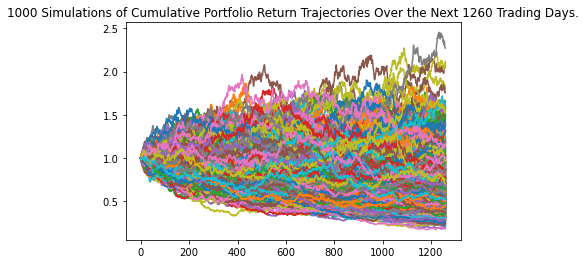

In [29]:
# Visualize the Monte Carlo simulation for a majority weight in Exxon
# by creating an overlay line plot
exxon_line_plot = MC_exxon.plot_simulation()

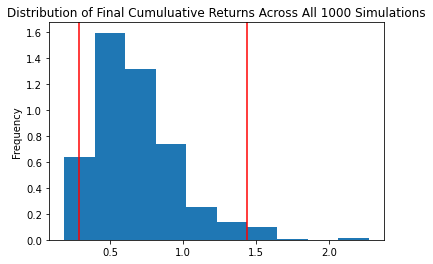

In [30]:
# Visualize the Monte Carlo simulation for a majority weight in Exxon
# by creating a histogram
exxon_dist_plot = MC_exxon.plot_distribution()

In [31]:
# Generate the summary statistics for the Monte Carlo simulation with
# majority weight in Exxon
# Save the summary statistics information in a variable called nexxontable 
exxon_table = MC_exxon.summarize_cumulative_return()

# Print summary statistics
print(exxon_table)

count           1000.000000
mean               0.677331
std                0.289105
min                0.185818
25%                0.465677
50%                0.619802
75%                0.819156
max                2.269868
95% CI Lower       0.285925
95% CI Upper       1.437359
Name: 1260, dtype: float64


In [32]:
# Using the lower and upper `95%` confidence interval values 
# (index positions 8 & 9 from the exxon_table),
# calculate  the range of the possible outcomes for a $15,000 investment 
exxon_ci_lower = round(exxon_table[8]*15000,2)
exxon_ci_upper = round(exxon_table[9]*15000,2)

# Print results
# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with a 60% weight in Exxon over the next 5 years will end within in the range of"
      f" ${exxon_ci_lower} and ${exxon_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio with a 60% weight in Exxon over the next 5 years will end within in the range of $4288.87 and $21560.38.


## Step 15: Review all four simulated portfolios, and determine which set of investments gives you the best chance of a profit. In your notebook, write which portfolio you choose, and why.

In [33]:
# Even weighted stocks
print("Even weighted stocks")
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with an even weight over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")
print("------------")

# 60% for AT&T
print("60% for AT&T")
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with a 60% weight in AT&T over the next 5 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")
print("------------")

# 60% for Nike
print("60% for Nike")
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with a 60% weight in Nike over the next 5 years will end within in the range of"
      f" ${nike_ci_lower} and ${nike_ci_upper}.")
print("------------")

# 60% for Exxon
print("60% for Exxon")
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with a 60% weight in Exxon over the next 5 years will end within in the range of"
      f" ${exxon_ci_lower} and ${exxon_ci_upper}.")
print("------------")

Even weighted stocks
There is a 95% chance that an initial investment of $15,000 in the portfolio with an even weight over the next 5 years will end within in the range of $6458.9 and $25718.64.
------------
60% for AT&T
There is a 95% chance that an initial investment of $15,000 in the portfolio with a 60% weight in AT&T over the next 5 years will end within in the range of $5195.84 and $27625.66.
------------
60% for Nike
There is a 95% chance that an initial investment of $15,000 in the portfolio with a 60% weight in Nike over the next 5 years will end within in the range of $8363.59 and $45966.15.
------------
60% for Exxon
There is a 95% chance that an initial investment of $15,000 in the portfolio with a 60% weight in Exxon over the next 5 years will end within in the range of $4288.87 and $21560.38.
------------


**Question:** Based on the above information, which set of investments gives you the best chance of a profit?

**Answer** Looking across all four simulations, the portfolio breakdown with the greatest chance of success looks to be the portfolio with a majority of Nike stock. Although all four portfolios have a chance to lose money, the Nike portfolio is roughly the same level of risk with far more upside potential.